In [1]:
import os 
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import sim functions
from neurodsp.sim import (sim_oscillation, sim_bursty_oscillation, sim_variable_oscillation, sim_damped_oscillation)
from neurodsp.sim.combined import sim_combined, sim_peak_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

# 시드 설정 - 동일한 시뮬레이션 결과를 위해 설정
# 1000_data: seed = 10
# 2000_data: seed = 20
# 10000_data: seed = 100 
np.random.seed(100)

# Set some general settings, to be used across all simulations
num_signals = 10000
fs = 2000 #sampling 주파수
n_seconds = 2 #simulation 지속시간
times = create_times(n_seconds, fs) #시간 백터

# -------- < 저장 > ------------------------------------------------

fpath = "C:/Users/stell/OneDrive/바탕 화면/10000_data/"
# fpath = "../../data/evaluation_data/"
# fpath = "../../data/synthetic_data/evaluation_data/"


In [2]:
# Define the components of the combined signal to simulate
n_neurons_range = (800, 1200)  # range for number of neurons
firing_rate_range = (2, 4)     # range for firing rate
t_ker_range = (0.8, 1.2)       # range for t_ker
tau_r_range = (0.001, 0.003)   # range for tau_r
tau_d_range = (0.015, 0.025)   # range for tau_d
freq_range = (1, 50)           # range for oscillation frequency

# 초기 빈 numpy 배열 생성
Clean = np.zeros((0, len(times)))   

In [3]:
for idx in range(num_signals):
    # Sample values from the specified ranges for each signal sample
    n_neurons = np.random.randint(n_neurons_range[0], n_neurons_range[1] + 1)
    firing_rate = np.random.uniform(firing_rate_range[0], firing_rate_range[1])
    t_ker = np.random.uniform(t_ker_range[0], t_ker_range[1])
    tau_r = np.random.uniform(tau_r_range[0], tau_r_range[1])
    tau_d = np.random.uniform(tau_d_range[0], tau_d_range[1])
    freq = np.random.uniform(freq_range[0], freq_range[1])
    
    components = {
        'sim_synaptic_current': {
            'n_neurons': n_neurons,
            'firing_rate': firing_rate,
            't_ker': t_ker,
            'tau_r': tau_r,
            'tau_d': tau_d
        },
        'sim_oscillation': {
            'freq': freq
        }
    }
    
    # Simulate an oscillation over an aperiodic component
    Clean_signal = sim_combined(n_seconds, fs, components)
    
    Clean = np.append(Clean, [Clean_signal], axis=0)

(10000, 4000)


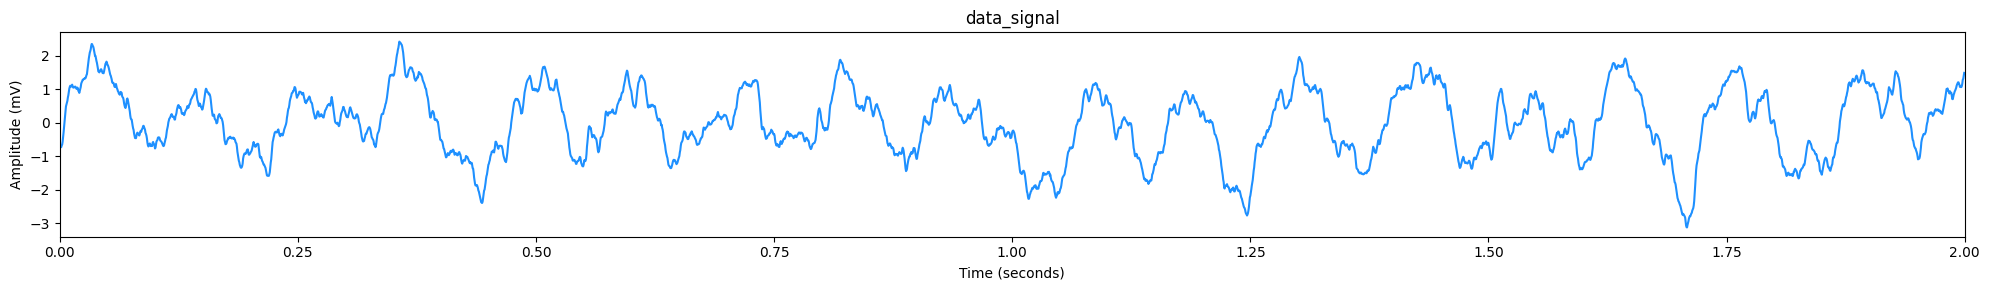

In [4]:
# 확대할 구간 설정
plt.figure(figsize=(20, 3))

plt.plot(times, Clean[0, :], label = 'data signal', c='dodgerblue')
plt.ylabel("Amplitude (mV)"); plt.xlabel("Time (seconds)");plt.title('data_signal')
plt.xlim([0, 2])

plt.tight_layout()

print(Clean.shape)

In [5]:
# -------- < data > ------------------------------------------------

np.save(fpath + "clean_data" + ".npy", Clean)
